# Data Analysis Interview Challenge

## Part 1 ‐ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15-minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
dfl = pd.read_json('logins.json')
dfl.head(10)

login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21
5 1970-01-01 20:21:41
6 1970-01-01 20:12:16
7 1970-01-01 20:35:47
8 1970-01-01 20:35:38
9 1970-01-01 20:47:52

In [8]:
dfl.shape

(93142, 1)

In [9]:
dfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [10]:
dfl.set_index('login_time', inplace = True)
dfl['count'] = 1

In [11]:
#organize login counts based on 15 minute time intervals
rdf = dfl.resample('15T', label='right').sum()
rdf.head()

/var/folders/b3/w9_vw_210b10pnqrtdbf_khm0000gn/T/ipykernel_24718/284594557.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  rdf = dfl.resample('15T', label='right').sum()


count
login_time                
1970-01-01 20:15:00      2
1970-01-01 20:30:00      6
1970-01-01 20:45:00      9
1970-01-01 21:00:00      7
1970-01-01 21:15:00      1

In [12]:
rdf.tail()

count
login_time                
1970-04-13 18:00:00      5
1970-04-13 18:15:00      5
1970-04-13 18:30:00      2
1970-04-13 18:45:00      7
1970-04-13 19:00:00      6

In [13]:
rdf.shape

(9788, 1)

In [14]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:15:00 to 1970-04-13 19:00:00
Freq: 15min
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


There are 9788 records from 1970-01-01 20:15:00 to 1970-04-13 19:00:00. There are n0 null values in count column.



In [16]:
rdf = rdf.fillna(0)

In [17]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:15:00 to 1970-04-13 19:00:00
Freq: 15min
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


Extract time data from the dataset.

In [19]:
rdf['time'] = pd.to_datetime(rdf.index)

In [20]:
print(type(rdf.time[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


/var/folders/b3/w9_vw_210b10pnqrtdbf_khm0000gn/T/ipykernel_24718/1585917251.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(type(rdf.time[0]))


In [21]:
rdf['month'] = rdf.time.dt.month
rdf['day'] = rdf.time.dt.day
rdf['hour'] = rdf.time.dt.hour
rdf['week'] = rdf.time.dt.isocalendar().week
rdf['weekday'] = rdf.time.dt.weekday

In [22]:
rdf.head()

count                time  month  day  hour  week  \
login_time                                                               
1970-01-01 20:15:00      2 1970-01-01 20:15:00      1    1    20     1   
1970-01-01 20:30:00      6 1970-01-01 20:30:00      1    1    20     1   
1970-01-01 20:45:00      9 1970-01-01 20:45:00      1    1    20     1   
1970-01-01 21:00:00      7 1970-01-01 21:00:00      1    1    21     1   
1970-01-01 21:15:00      1 1970-01-01 21:15:00      1    1    21     1   

                     weekday  
login_time                    
1970-01-01 20:15:00        3  
1970-01-01 20:30:00        3  
1970-01-01 20:45:00        3  
1970-01-01 21:00:00        3  
1970-01-01 21:15:00        3

In [23]:
rdf.tail()

count                time  month  day  hour  week  \
login_time                                                               
1970-04-13 18:00:00      5 1970-04-13 18:00:00      4   13    18    16   
1970-04-13 18:15:00      5 1970-04-13 18:15:00      4   13    18    16   
1970-04-13 18:30:00      2 1970-04-13 18:30:00      4   13    18    16   
1970-04-13 18:45:00      7 1970-04-13 18:45:00      4   13    18    16   
1970-04-13 19:00:00      6 1970-04-13 19:00:00      4   13    19    16   

                     weekday  
login_time                    
1970-04-13 18:00:00        0  
1970-04-13 18:15:00        0  
1970-04-13 18:30:00        0  
1970-04-13 18:45:00        0  
1970-04-13 19:00:00        0

In [24]:
# Group by month
print ('[Grouping by month]')
print (rdf.groupby('month')['count'].aggregate(np.sum))

[Grouping by month]
month
1    21225
2    24669
3    33727
4    13521
Name: count, dtype: int64


/var/folders/b3/w9_vw_210b10pnqrtdbf_khm0000gn/T/ipykernel_24718/1330039008.py:3: FutureWarning: The provided callable <function sum at 0x114347560> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print (rdf.groupby('month')['count'].aggregate(np.sum))


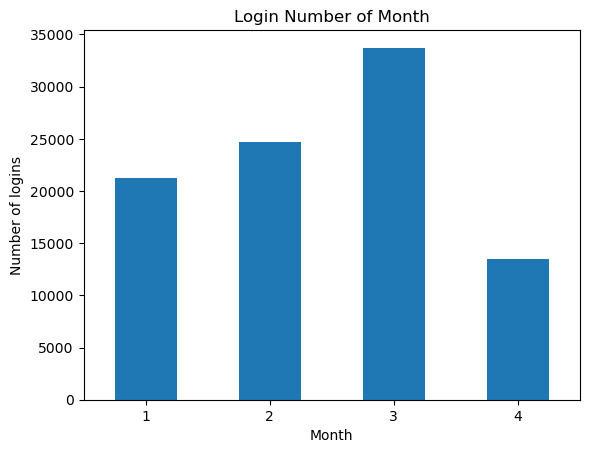

In [25]:
rdf.groupby('month')['count'].sum().plot(kind='bar')
plt.title("Login Number of Month")
plt.xlabel("Month")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)
plt.show()

The number of logins steadily increased from January to March, with March having the highest count. Since there are only 13 days of data available for April, it is insufficient for a meaningful comparison with the other months.







## Login activities in different weeks ##


In [28]:
print ('[Grouping by week]')
print(rdf.groupby('week')['count'].aggregate(np.sum))

[Grouping by week]
week
1     2368
2     5218
3     5021
4     4750
5     4747
6     5564
7     5914
8     7038
9     6554
10    7400
11    7329
12    8959
13    7284
14    8096
15    6496
16     404
Name: count, dtype: int64


/var/folders/b3/w9_vw_210b10pnqrtdbf_khm0000gn/T/ipykernel_24718/2412013347.py:2: FutureWarning: The provided callable <function sum at 0x114347560> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(rdf.groupby('week')['count'].aggregate(np.sum))


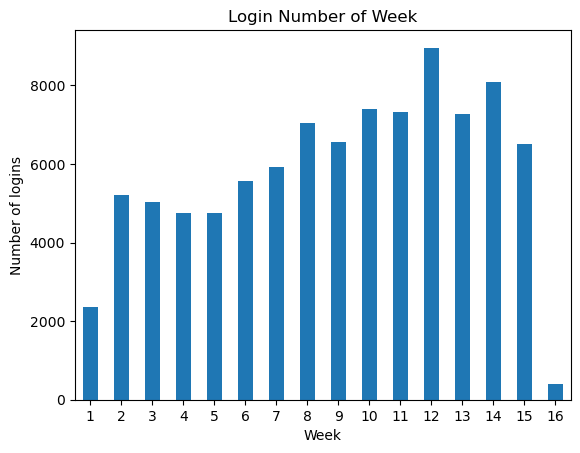

In [29]:
rdf.groupby('week')['count'].sum().plot(kind='bar')
plt.title("Login Number of Week")
plt.xlabel("Week")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)
plt.show()

Logins peaked in week 12, which corresponds to the last week of March. Week 14, the second week of April, had the second-highest number of logins.




## Login activities in different weekdays


In [32]:
# Group by weekday
import calendar
nweek = 16   # total weeks 
print ('[Grouping by weekday]')
print (rdf.groupby('weekday')['count'].aggregate(np.sum)/nweek)

[Grouping by weekday]
weekday
0     553.0625
1     576.6250
2     642.6250
3     746.9375
4     947.0000
5    1214.6250
6    1140.5000
Name: count, dtype: float64


/var/folders/b3/w9_vw_210b10pnqrtdbf_khm0000gn/T/ipykernel_24718/1341509838.py:5: FutureWarning: The provided callable <function sum at 0x114347560> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print (rdf.groupby('weekday')['count'].aggregate(np.sum)/nweek)


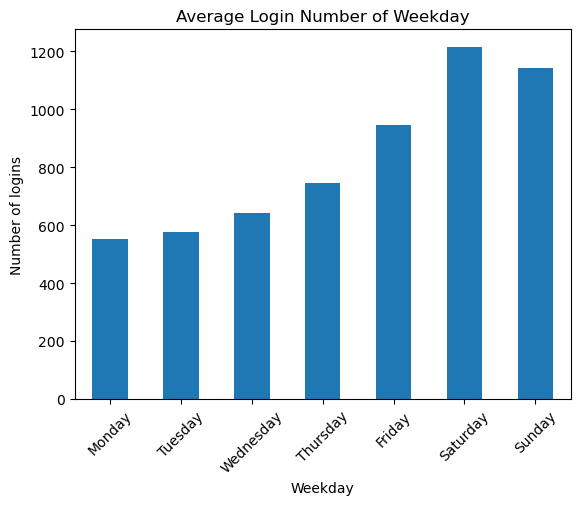

In [33]:
ax = (rdf.groupby('weekday')['count'].sum()/nweek).plot(kind='bar')
plt.title("Average Login Number of Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of logins")
plt.xticks(rotation=45)
ax.set_xticklabels([calendar.day_name[d] for d in range(7)])
plt.show()

The number of logins consistently increased from Monday to Saturday. There were more logins on weekends compared to weekdays, with Saturday having the highest number of logins, followed by Sunday in second place, and Friday in third.

In [35]:
# Aggregate login counts based on 1-day time intervals
df_day = dfl.resample('D').sum()
df_day.head()

count
login_time       
1970-01-01    112
1970-01-02    681
1970-01-03    793
1970-01-04    788
1970-01-05    459

In [36]:
df_day['date'] = pd.to_datetime(df_day.index)
df_day['weekday'] = df_day.date.dt.weekday
df_day.head()

count       date  weekday
login_time                           
1970-01-01    112 1970-01-01        3
1970-01-02    681 1970-01-02        4
1970-01-03    793 1970-01-03        5
1970-01-04    788 1970-01-04        6
1970-01-05    459 1970-01-05        0

/var/folders/b3/w9_vw_210b10pnqrtdbf_khm0000gn/T/ipykernel_24718/88619014.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([calendar.day_name[d] for d in range(7)])


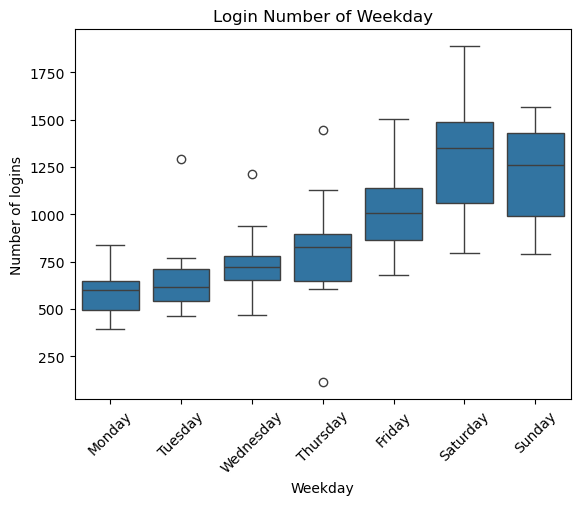

In [37]:
import seaborn as sns

ax = sns.boxplot(x='weekday', y='count', data=df_day)
plt.title("Login Number of Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of logins")
plt.xticks(rotation=45)
ax.set_xticklabels([calendar.day_name[d] for d in range(7)])
plt.show()

We can observe a similar trend from the boxplot above. However, there were some outliers on Tuesday, Wednesday, and Thursday. The login numbers on weekends showed the most variation compared to other days.








Login activities in daily cycle


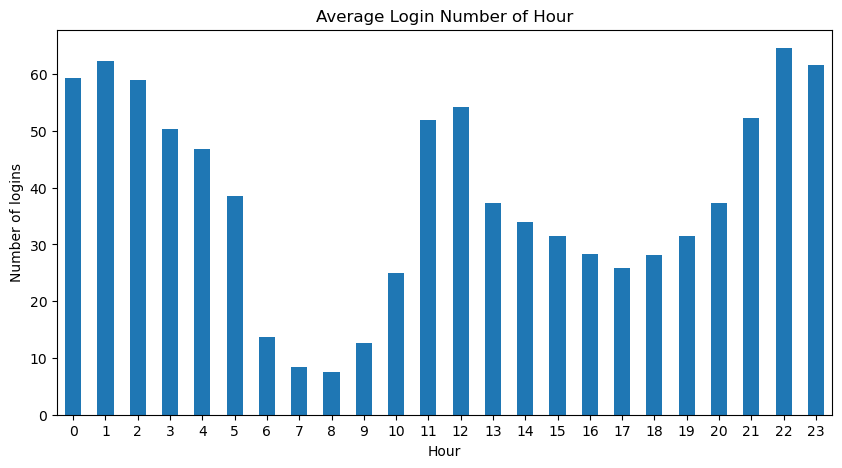

In [40]:
# Group by hour
nday = 30+28+30+13   
(rdf.groupby('hour')['count'].sum()/nday).plot(kind='bar', figsize=(10,5))
plt.title("Average Login Number of Hour")
plt.xlabel("Hour")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)
plt.show()

Most logins are at night, from 10 PM to 2 AM. Least logins are in the moring. There are more logins at noon than in the afternoon.



In [42]:
# Organize login counts based on 1-hour time intervals
df_hour = dfl.resample('H').sum()
df_hour.head()

/var/folders/b3/w9_vw_210b10pnqrtdbf_khm0000gn/T/ipykernel_24718/2446374337.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hour = dfl.resample('H').sum()


count
login_time                
1970-01-01 20:00:00     24
1970-01-01 21:00:00      9
1970-01-01 22:00:00     21
1970-01-01 23:00:00     58
1970-01-02 00:00:00     53

In [43]:
df_hour['time'] = pd.to_datetime(df_hour.index)
df_hour['hour'] = df_hour.time.dt.hour
df_hour.head()

count                time  hour
login_time                                          
1970-01-01 20:00:00     24 1970-01-01 20:00:00    20
1970-01-01 21:00:00      9 1970-01-01 21:00:00    21
1970-01-01 22:00:00     21 1970-01-01 22:00:00    22
1970-01-01 23:00:00     58 1970-01-01 23:00:00    23
1970-01-02 00:00:00     53 1970-01-02 00:00:00     0

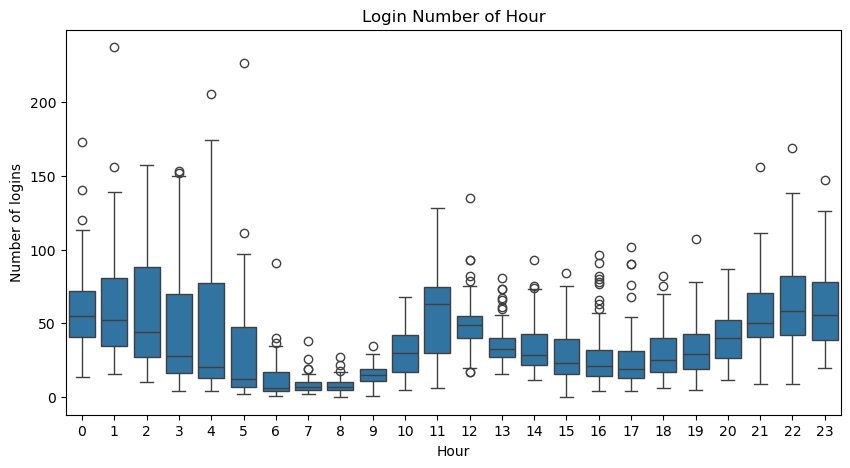

In [44]:
sns.mpl.rc("figure", figsize=(10,5))
sns.boxplot(x='hour', y='count', data=df_hour)
plt.title("Login Number of Hour")
plt.xlabel("Hour")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)
plt.show()


From this boxplot, we observe the same trend as in the previous bar chart, confirming the overall pattern. However, the boxplot reveals several outliers, indicating occasional deviations in login numbers during certain time periods. Notably, the variation between 2 AM and 4 AM is more pronounced, with a wider range of login numbers compared to other hours, suggesting irregular activity during this time. This could be due to specific user behaviors or events driving higher variability in late-night login activity.

## Result:

Login counts steadily increased from January to March, with March recording the highest activity. On a weekly basis, the number of logins fluctuated slightly, peaking in week 12 (the final week of March) and reaching the second-highest point in week 14 (the second week of April).

Throughout the week, login numbers consistently rose from Monday to Saturday. Weekends saw more activity than weekdays, with Saturday having the highest number of logins, followed by Sunday and Friday. Weekend logins also displayed the greatest variation.

Most logins occurred during the night, specifically between 10 PM and 2 AM, while mornings had the fewest logins. Noon saw more activity than the afternoon, and the greatest variation in login counts occurred between 2 AM and 4 AM.

# Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
   
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the observation
c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

# Solution:

The key measure of success for this experiment will be the toll costs reimbursed to driver partners in two cities and the percentage of reimbursed costs relative to the total toll charges. An increase in reimbursed toll costs will indicate that more driver partners are traveling between the two cities. Additionally, if the percentage of reimbursed toll costs compared to total toll charges rises, it suggests that more intercity trips are being made by driver partners. The larger the reimbursed costs and percentages, the more successful the experiment will be.

To execute the experiment, I will collect data on reimbursed toll costs, including details such as the date, time, toll cost, travel direction, city of origin for the driver partner, and the total toll costs charged. This data will then be aggregated and analyzed to identify trends. If both reimbursed costs and the percentage of reimbursements increase, it will be a positive indicator.

I will also perform significance tests to validate the significance of any observed trends.

To conclude, I will visualize the results, showing trends by weekday, time of day, direction, and reimbursement percentage. A presentation will be prepared to share findings and provide recommendations to the city operations team.

# Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).

Data description

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYY MM DD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: the average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

I. Data Wrangling


In [85]:
import json

file = open('ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
file.close()

Analyze dataframe.

In [87]:
df.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  
0         46.2      3.67                   5.0  
1         50.0      8.26                   5.0  
2        100.0      0.77                   5.0  
3         80.0      2.36                   4.9  
4         82.4      3.13                   4.9

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


 'avg_rating_by_driver', 'avg_rating_of_driver', and 'phone' have missing values, so I will fill them in.

In [92]:
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df.dropna(axis=0, inplace=True)

/var/folders/b3/w9_vw_210b10pnqrtdbf_khm0000gn/T/ipykernel_24718/3777265005.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
/var/folders/b3/w9_vw_210b10pnqrtdbf_khm0000gn/T/ipykernel_24718/3777265005.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

In [94]:
df = df.reset_index(drop=True)

Check on dataset.

In [96]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49604 entries, 0 to 49603
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    49604 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49604 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


The null values have been replaced with the mean of the columns its in.

Will convert dates to datetime format.

In [99]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49604 entries, 0 to 49603
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

II. Exploratory Data Analysis

Will create a box plot of all categorical, non-date data.

In [107]:
categorical_features = ['city', 'phone', 'ultimate_black_user']


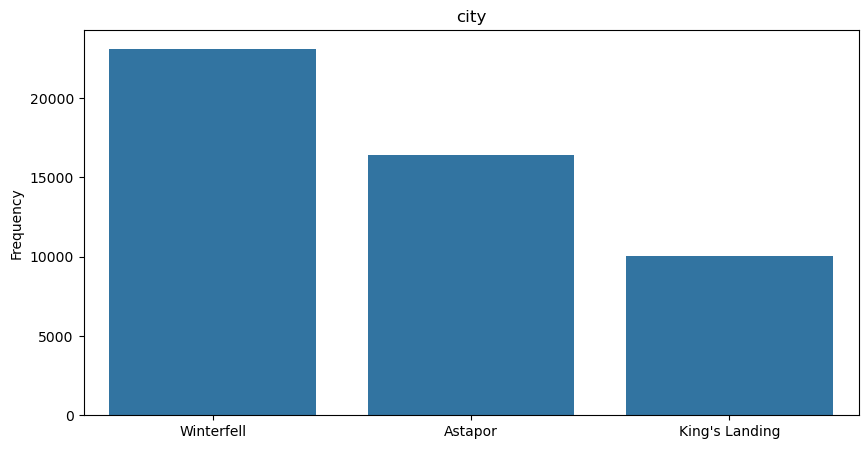

city
Winterfell        23125
Astapor           16413
King's Landing    10066
Name: count, dtype: int64


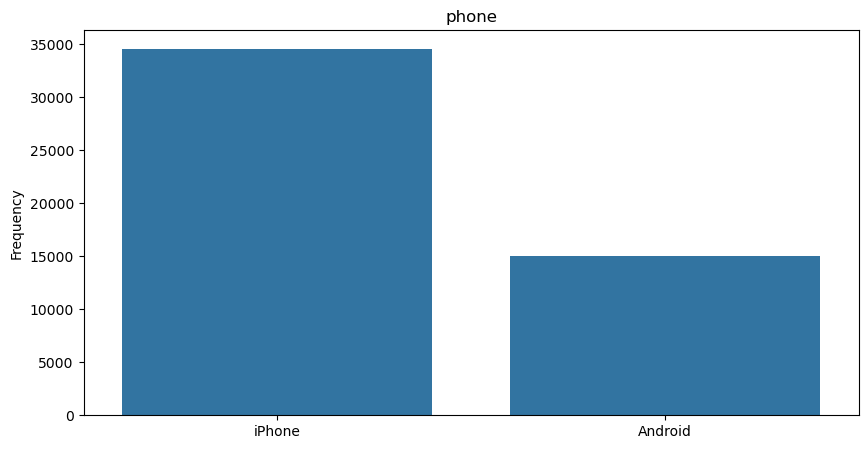

phone
iPhone     34582
Android    15022
Name: count, dtype: int64


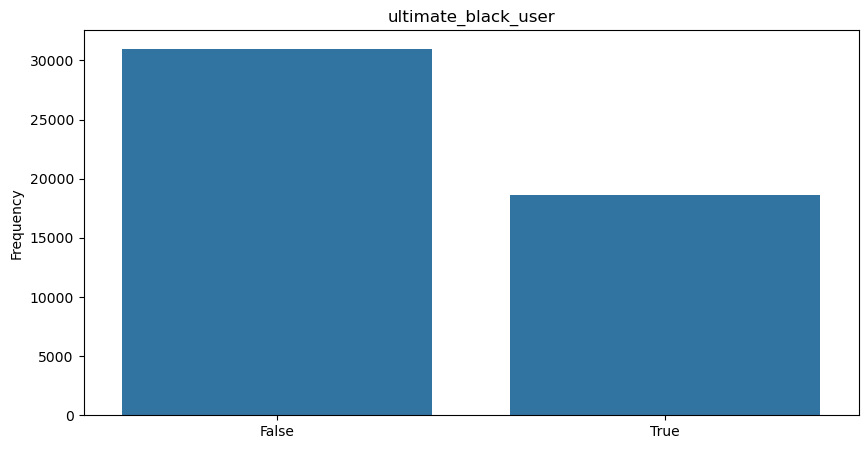

ultimate_black_user
False    30992
True     18612
Name: count, dtype: int64


In [109]:
for feature in categorical_features:
    sns.barplot(x = list(df[feature].value_counts().index), y = df[feature].value_counts())
    plt.title(feature)
    plt.ylabel('Frequency')
    plt.show()
    print(df[feature].value_counts())

Show distributions of the numerical features.

In [112]:
numerical_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
                      'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']

/var/folders/b3/w9_vw_210b10pnqrtdbf_khm0000gn/T/ipykernel_24718/3975455550.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


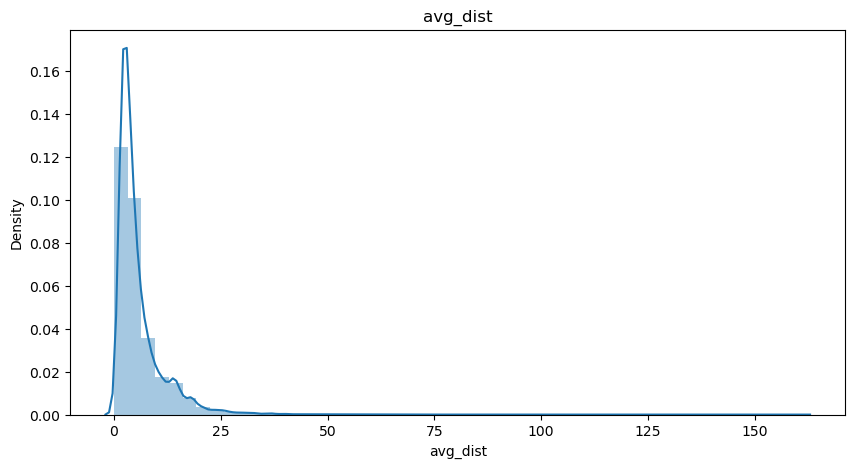

/var/folders/b3/w9_vw_210b10pnqrtdbf_khm0000gn/T/ipykernel_24718/3975455550.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


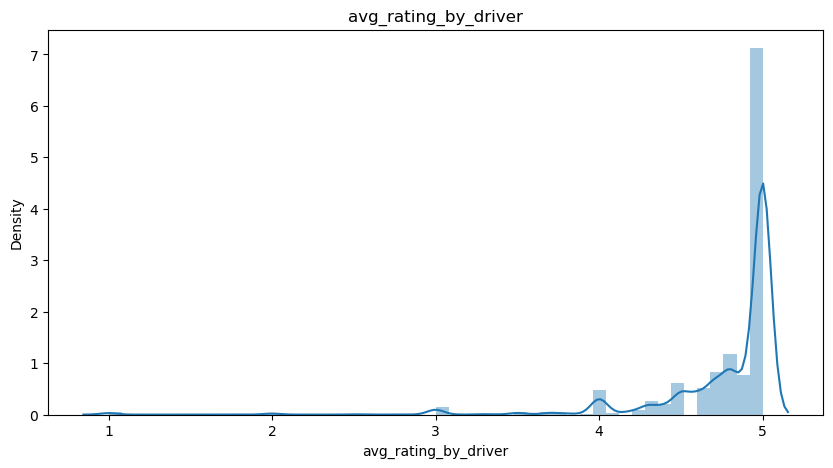

/var/folders/b3/w9_vw_210b10pnqrtdbf_khm0000gn/T/ipykernel_24718/3975455550.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


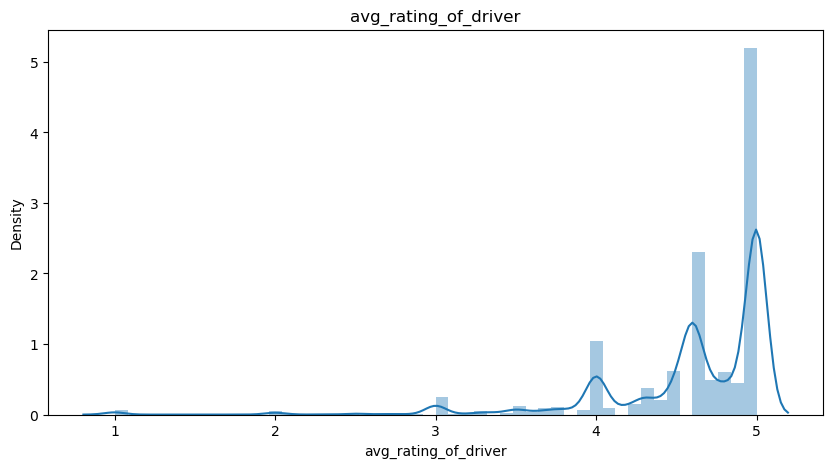

/var/folders/b3/w9_vw_210b10pnqrtdbf_khm0000gn/T/ipykernel_24718/3975455550.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


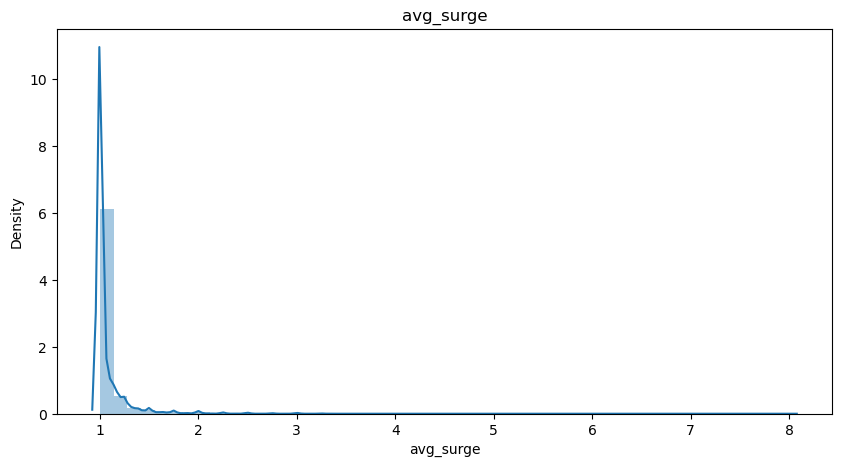

/var/folders/b3/w9_vw_210b10pnqrtdbf_khm0000gn/T/ipykernel_24718/3975455550.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


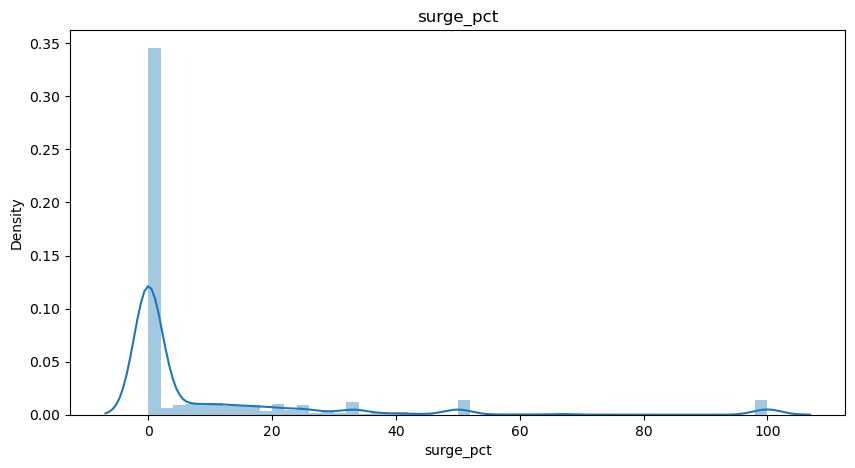

/var/folders/b3/w9_vw_210b10pnqrtdbf_khm0000gn/T/ipykernel_24718/3975455550.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


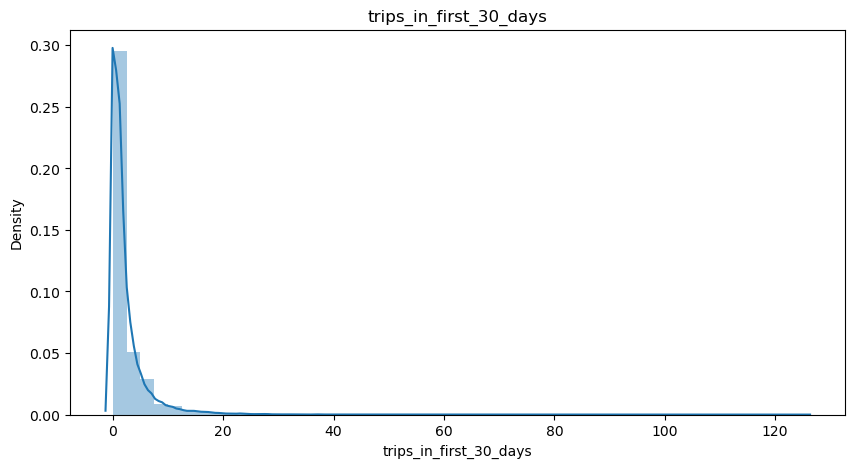

/var/folders/b3/w9_vw_210b10pnqrtdbf_khm0000gn/T/ipykernel_24718/3975455550.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


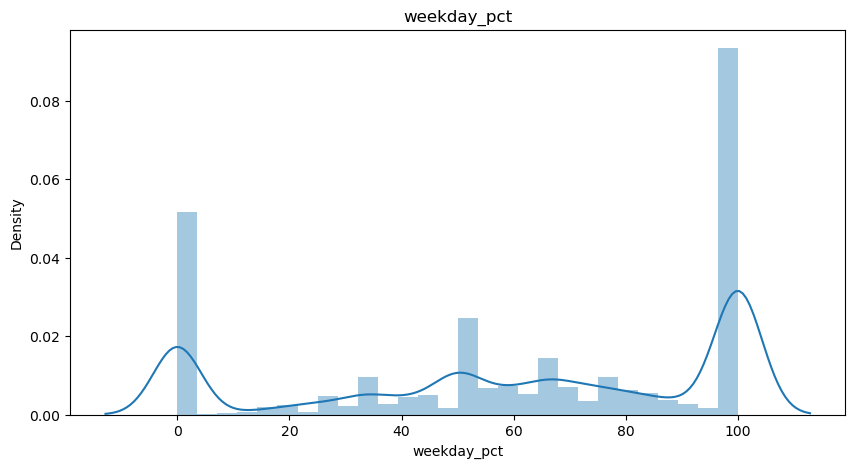

In [114]:
for feature in numerical_features:
    sns.distplot(df[feature])
    plt.title(feature)
    plt.show();

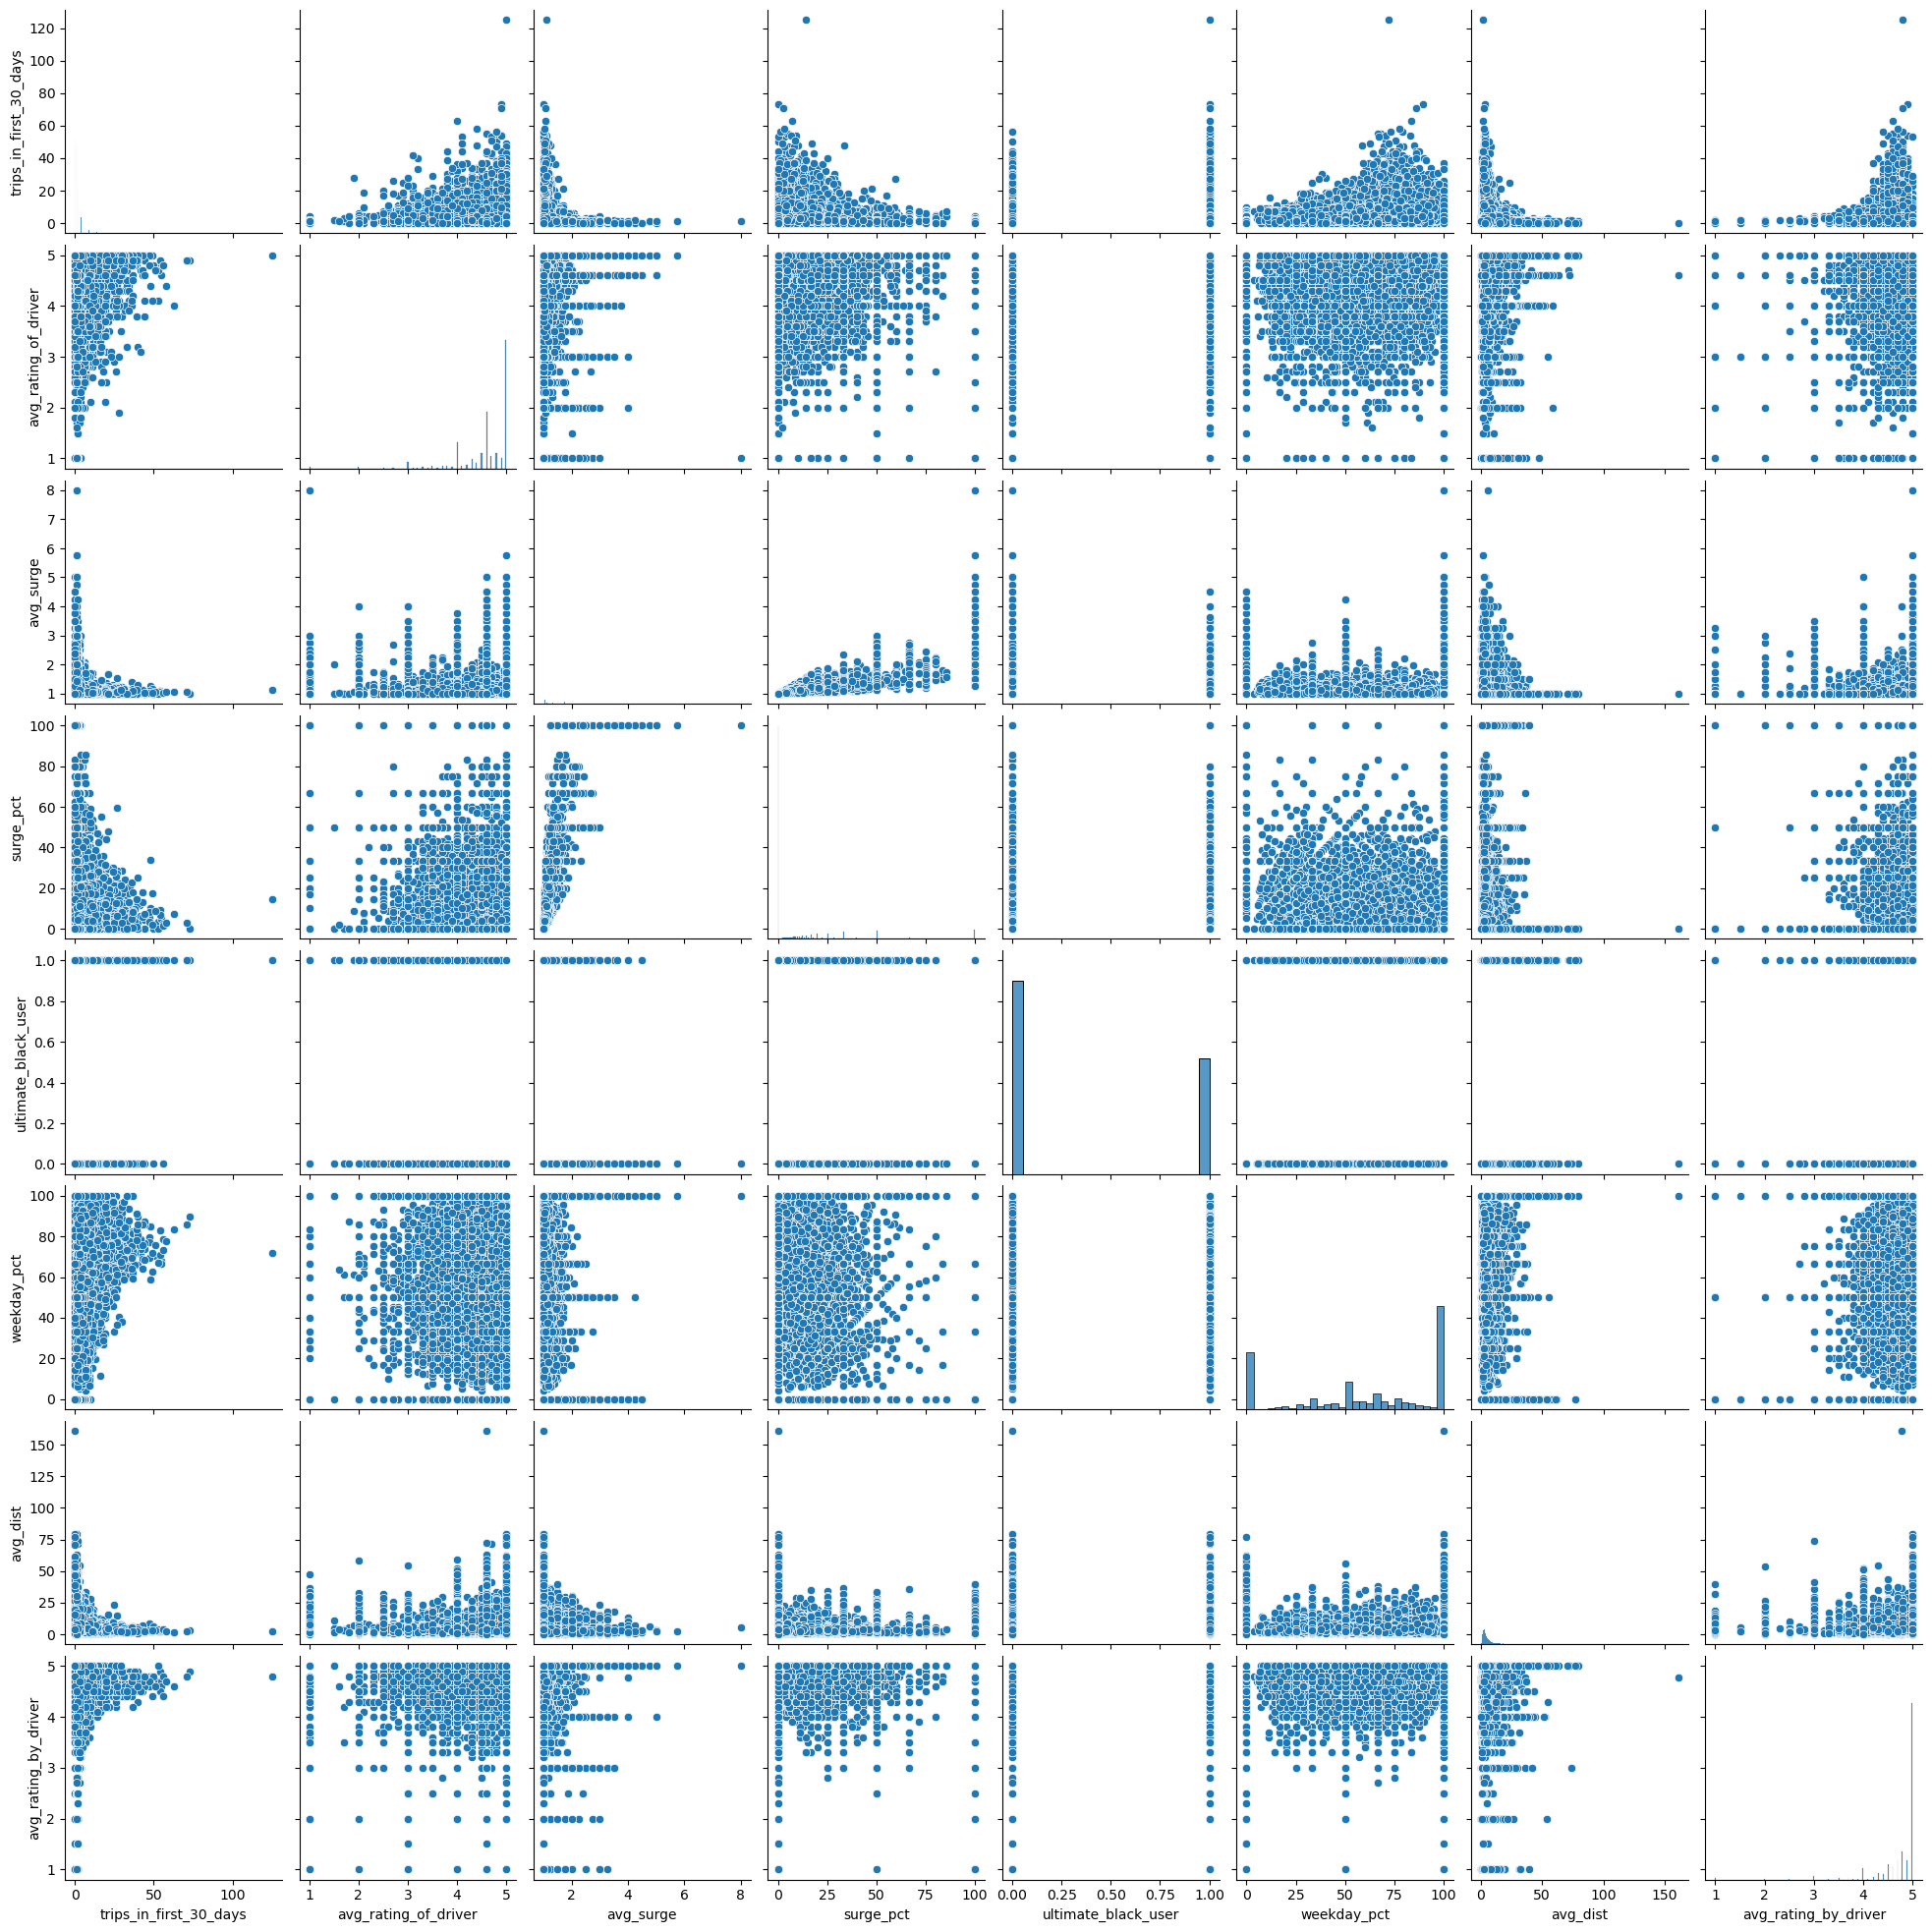

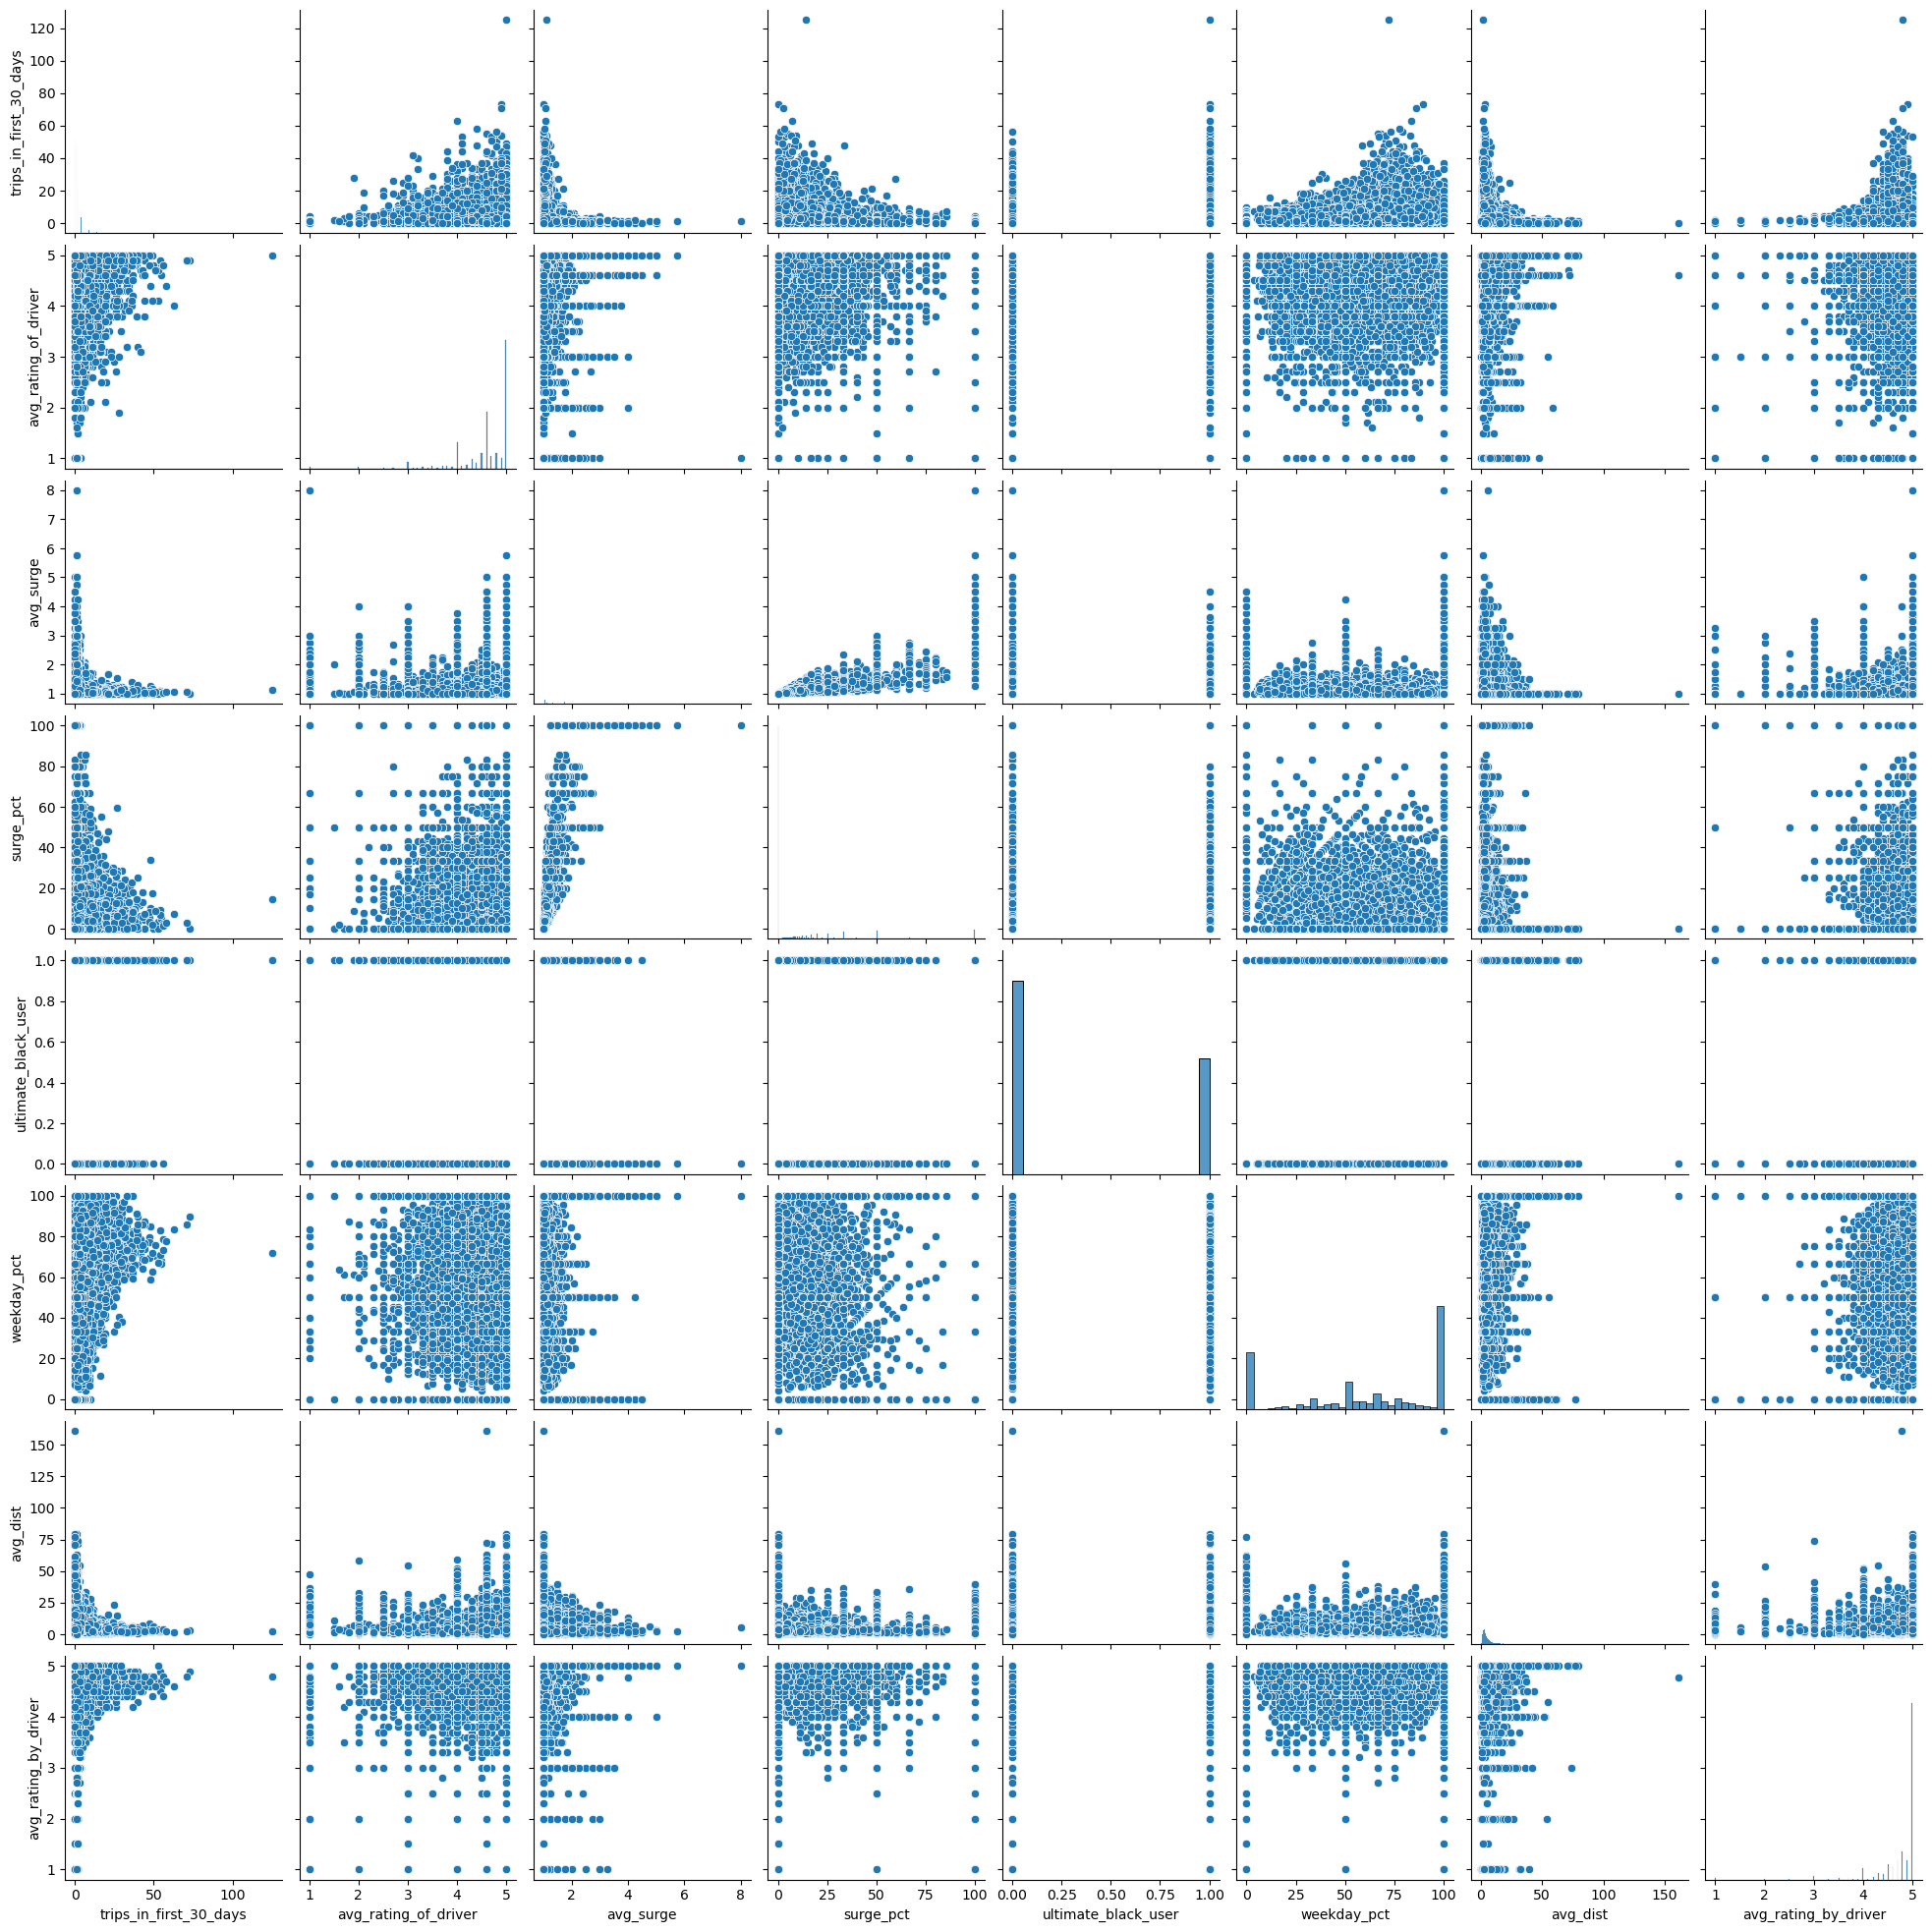

In [124]:
sns.pairplot(df)
plt.show()

What fraction of the observed users were retained?



In [130]:
df.sort_values(by='last_trip_date').tail()

city  trips_in_first_30_days signup_date  \
45166  King's Landing                       2  2014-01-25   
12053  King's Landing                      16  2014-01-18   
18667         Astapor                       3  2014-01-10   
11999      Winterfell                       1  2014-01-24   
31351      Winterfell                      12  2014-01-19   

       avg_rating_of_driver  avg_surge last_trip_date    phone  surge_pct  \
45166                   4.4       1.14     2014-07-01  Android       17.9   
12053                   4.9       1.02     2014-07-01  Android        3.9   
18667                   4.7       1.02     2014-07-01   iPhone        3.2   
11999                   4.7       1.04     2014-07-01   iPhone       15.4   
31351                   4.9       1.07     2014-07-01   iPhone        6.0   

       ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  
45166                False         83.9      2.32                   4.8  
12053                False         74.0      2.64                   4.8  
18667                False         67.7      6.22                   4.8  
11999                 True         38.5      6.80                   4.9  
31351                 True         70.0      5.63                   4.7

In [132]:
df['last_trip_date'].sort_values().tail()

45166   2014-07-01
12053   2014-07-01
18667   2014-07-01
11999   2014-07-01
31351   2014-07-01
Name: last_trip_date, dtype: datetime64[ns]

The most recent last_trip_date is 2014-07-01. Since we define a user as retained if they were "active" (i.e., took a trip) within the last 30 days, we consider a user retained if their last_trip_date is after 2014-06-01.

In [135]:
frac = len(df[df['last_trip_date'] > '2014-06-01'])/len(df)
print('{:.2f}% of the observed users were retained.'.format(frac*100))

36.65% of the observed users were retained.


III. Data Modeling


3.1 Prepare dataset


In [139]:
df['retained'] = (df['last_trip_date'] > '2014-06-01')*1

In [141]:
df.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  retained  
0         46.2      3.67                   5.0         1  
1         50.0      8.26                   5.0         0  
2        100.0      0.77                   5.0         0  
3         80.0      2.36                   4.9         1  
4         82.4      3.13                   4.9         0

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49604 entries, 0 to 49603
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
 12  retained                49604 non-null  int64 

drop the datetime features

In [146]:
df.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)

In [148]:
df.head()

city  trips_in_first_30_days  avg_rating_of_driver  avg_surge  \
0  King's Landing                       4                   4.7       1.10   
1         Astapor                       0                   5.0       1.00   
2         Astapor                       3                   4.3       1.00   
3  King's Landing                       9                   4.6       1.14   
4      Winterfell                      14                   4.4       1.19   

     phone  surge_pct  ultimate_black_user  weekday_pct  avg_dist  \
0   iPhone       15.4                 True         46.2      3.67   
1  Android        0.0                False         50.0      8.26   
2   iPhone        0.0                False        100.0      0.77   
3   iPhone       20.0                 True         80.0      2.36   
4  Android       11.8                False         82.4      3.13   

   avg_rating_by_driver  retained  
0                   5.0         1  
1                   5.0         0  
2                   5.0         0  
3                   4.9         1  
4                   4.9         0

Will create a dummy variables for categorical features

In [151]:
ndf = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'], drop_first=True)

In [153]:
ndf.head()

trips_in_first_30_days  avg_rating_of_driver  avg_surge  surge_pct  \
0                       4                   4.7       1.10       15.4   
1                       0                   5.0       1.00        0.0   
2                       3                   4.3       1.00        0.0   
3                       9                   4.6       1.14       20.0   
4                      14                   4.4       1.19       11.8   

   weekday_pct  avg_dist  avg_rating_by_driver  retained  city_King's Landing  \
0         46.2      3.67                   5.0         1                 True   
1         50.0      8.26                   5.0         0                False   
2        100.0      0.77                   5.0         0                False   
3         80.0      2.36                   4.9         1                 True   
4         82.4      3.13                   4.9         0                False   

   city_Winterfell  phone_iPhone  ultimate_black_user_True  
0            False          True                      True  
1            False         False                     False  
2            False          True                     False  
3            False          True                      True  
4             True         False                     False

The dataset ndf will be the final dataset we use for modeling in the next step








3.2 Split data into training and test sets

In [158]:
X = ndf.drop('retained', axis=1)
y = ndf['retained']

In [160]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39683, 11)
(9921, 11)
(39683,)
(9921,)


## 3.3 ML Model

We will be using the Random Forest Classifier in this step. The Random Forest algorithm is one of the most popular machine learning methods due to its good accuracy, robustness, and ease of use. It is also frequently utilized for feature selection.

Here are some advantages of the Random Forest algorithm compared to other classification algorithms:

No Overfitting: The Random Forest algorithm is highly resistant to overfitting, making it reliable for a wide range of classification problems.
Feature Engineering: It can be used to perform feature engineering by identifying the most important features from the available ones in the training dataset.

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [166]:
clf = RandomForestClassifier()
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.76716644 0.7596069  0.7693083  0.76524698 0.76449093]
Average 5-Fold CV Score: 0.7651639092327889


Using the Random Forest Classifier with default parameters, we can achieve a model accuracy of 75.73%.






## 3.4 Hyperparameter Tuning


In [175]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

Define function to display metrics

In [178]:
def get_metrics(true_labels, predicted_labels):
    print ('Accuracy: ', accuracy_score(true_labels,predicted_labels))
    print (classification_report(true_labels, predicted_labels))

Create the hyperparameter grid


In [182]:
n_options = [10,20,50,100,200]

feature_options = [5, 8, 10, 'auto', None]

oob_options = [True, False]

param_grid = {'n_estimators': n_options, 'max_features': feature_options, 'oob_score': oob_options}

In [185]:
clf_cv = GridSearchCV(clf, param_grid, cv=5)
clf_cv.fit(X_train, y_train)
y_predict = clf_cv.predict(X_test) 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This p

In [187]:
print("Tuned Parameter: {}".format(clf_cv.best_params_))
print("Tuned Score: {}".format(clf_cv.best_score_))
print()
print ('Test set performance:')
get_metrics(true_labels=y_test, predicted_labels=y_predict)

Tuned Parameter: {'max_features': None, 'n_estimators': 200, 'oob_score': True}
Tuned Score: 0.7675075576261853

Test set performance:
Accuracy:  0.7625239391190404
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      6290
           1       0.68      0.65      0.67      3631

    accuracy                           0.76      9921
   macro avg       0.74      0.74      0.74      9921
weighted avg       0.76      0.76      0.76      9921



After performing hyperparameter tuning, we obtained the best parameters as n_estimators=100, max_features=8, and oob_score=True, which resulted in an improved accuracy of 76.82%.








## 3.5 Final Model


In [192]:
rfc = RandomForestClassifier(n_estimators=100, max_features=8, oob_score=True)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [196]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Generating a classification report

In [199]:
print(classification_report(y_test, y_pred))
print('Test set accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      6290
           1       0.68      0.66      0.67      3631

    accuracy                           0.76      9921
   macro avg       0.74      0.74      0.74      9921
weighted avg       0.76      0.76      0.76      9921

Test set accuracy: 76.11%


Generating Confusion Matrix

In [202]:
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm, index=range(0,2), columns=range(0,2))

0     1
0  5170  1120
1  1250  2381

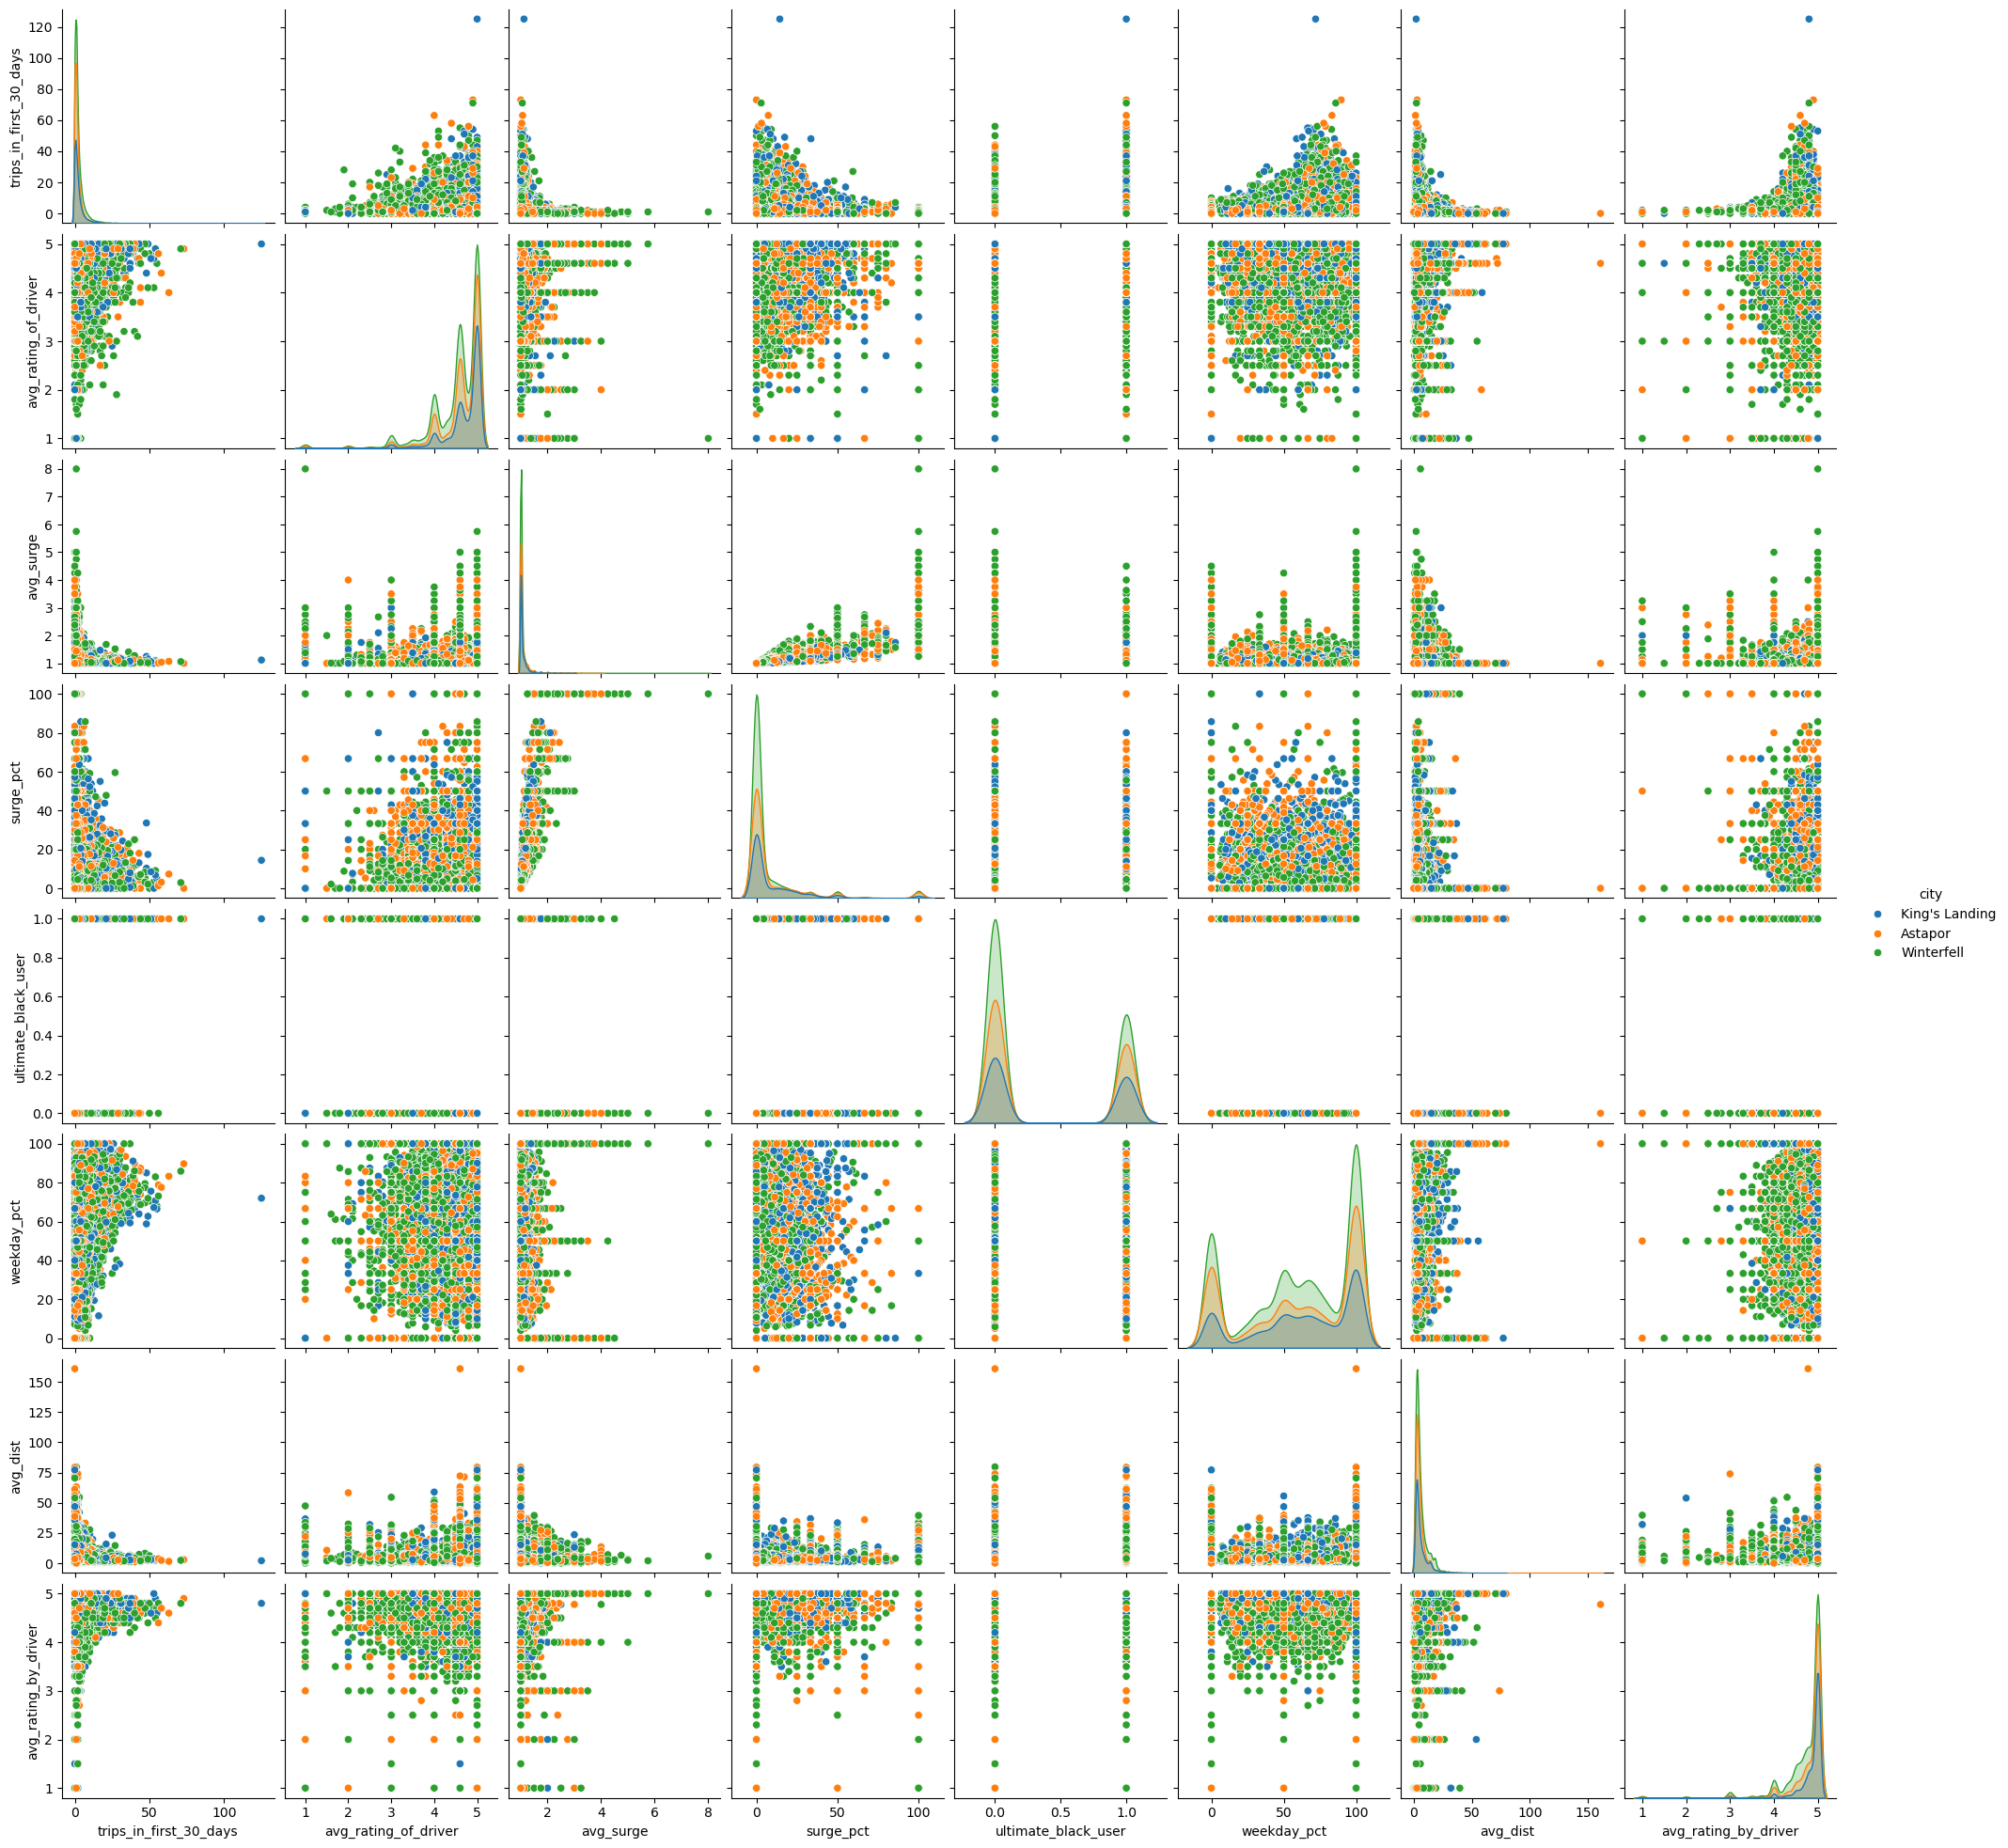

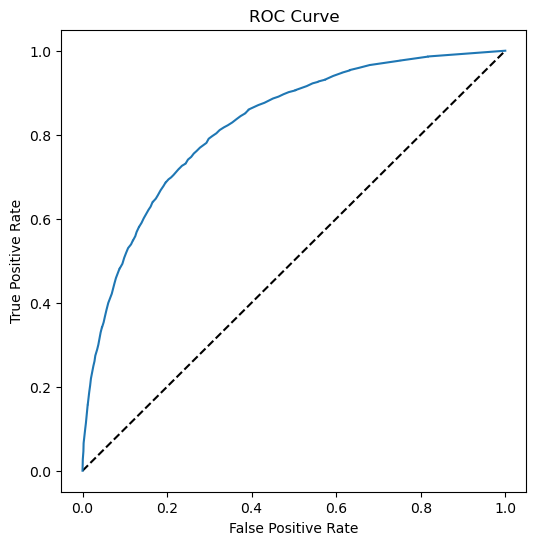

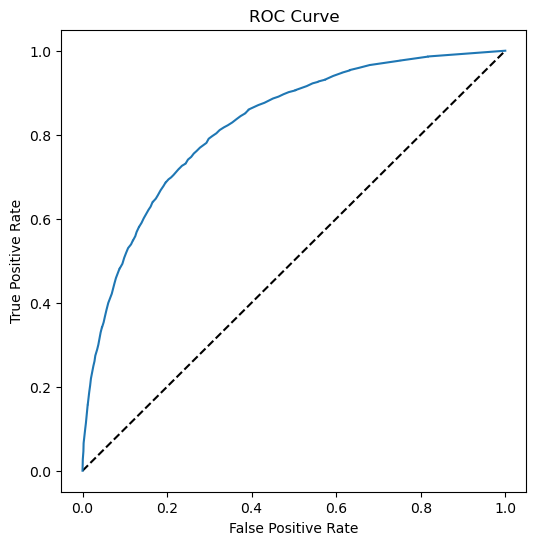

In [206]:
y_pred_prob = rfc.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [208]:
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8235


The metrics of final model:

Test set accuracy: 76.30%

AUC: 0.8234

## 3.6 Feature Selection


In [216]:
fi = pd.DataFrame(list(zip(X.columns, rfc.feature_importances_)), columns = ['features', 'Importance'])
fi.sort_values(by='Importance', ascending=False).head(5)

features  Importance
5              avg_dist    0.298081
6  avg_rating_by_driver    0.150383
4           weekday_pct    0.113699
3             surge_pct    0.087097
1  avg_rating_of_driver    0.080863

Based on feature importance analysis, the top three most important features are:

avg_dist: The average distance in miles per trip taken in the first 30 days after signup.

avg_rating_by_driver: The rider’s average rating across all of their trips.

weekday_pct: The percentage of the user’s trips that occur on weekdays.

## Insights for Ultimate

To enhance long-term rider retention, Ultimate should focus on the following strategies:

Encourage riders to take longer trips within the first 30 days after signing up.
    
Improve service quality to achieve higher ratings from riders.

Motivate riders to book more trips during weekdays.